# Simple Neural Network

**Name - Mitul Srivastava**

**ID - C00313606**

## **LOG** : Introduction to dataset and importing the data
### **DATASET** : MNIST Handwritten Digits
### **DETAIL** : The MNIST dataset contains 60,000 training images and 10,000 test images of handwritten digits (0-9).
### **AIM** : To train and fine tune Simple Neural network to correctly identify digits. 

## **LOG** : Importing required packages

In [6]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached wrapt-1.17.2-cp311-cp311-win_amd64.whl.metadata (6.5 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached numpy-2.1.3-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached h5py-3.13.0-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached ml_dtypes-

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.48.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 2.1.3 which is incompatible.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Mitul\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## **LOG** : Loading dataset using keras.datasets

In [7]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


## **LOG** : Normalising the dataset so that max value is 1 and min value is 0 by dividing by 255 because pixel has values from 0 to 255.
## This type of normalisation is called min-max scaling.

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0

## **LOG** : Defining values of neural network -
## 1. Defining image shape as 28x28 and the flattening it to a 1D array.
## 2. Creating a fully connected layer of 128 neurons with "relu" activation function.
## 3. Creating output layer with 10 classes and "softmax" activation.

In [10]:
model = keras.Sequential([
    keras.Input(shape=(28, 28)),  
    keras.layers.Flatten(),       
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

## **LOG** : Compiling the model with optimizer as "adam" and using "sparse_categorical_crossentropy" suitable for multi class classification for error and accuracy as the metric.

In [11]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## **LOG** : Training the model with 5 epochs.

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.8832 - loss: 0.4225
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9659 - loss: 0.1165
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9773 - loss: 0.0771
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9835 - loss: 0.0549
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9874 - loss: 0.0415


## **LOG** : Model evaluation

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9753 - loss: 0.0847    
Test accuracy: 0.9795


## **LOG** : Making predictions for test images

In [14]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


## **LOG** : Visualizing first test image and model prediction with actual value.

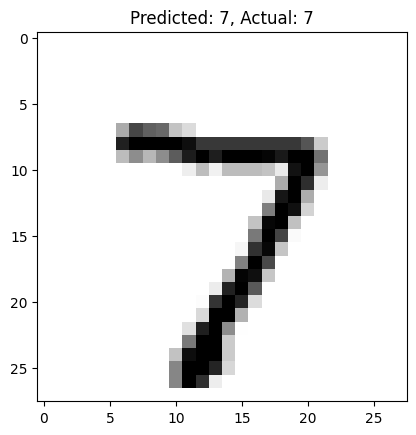

In [15]:
def plot_prediction(index):
    plt.imshow(x_test[index], cmap=plt.cm.binary)
    plt.title(f"Predicted: {np.argmax(predictions[index])}, Actual: {y_test[index]}")
    plt.show()

plot_prediction(0)

## **LOG**: IMproving the performance by -
## 1. Increasing the hidden layers from 128 to 256 to capture more patterns.
## 2. Adding dropout to reduce overfitting.
## 3. Increasing epochs to 10.

In [16]:
model_improved = keras.Sequential([
    keras.Input(shape=(28, 28)),  
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

## **LOG** : Compiling the improved model.

In [17]:
model_improved.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

model_improved.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8622 - loss: 0.4462 - val_accuracy: 0.9645 - val_loss: 0.1064
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9604 - loss: 0.1284 - val_accuracy: 0.9736 - val_loss: 0.0853
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9722 - loss: 0.0904 - val_accuracy: 0.9721 - val_loss: 0.0865
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9768 - loss: 0.0738 - val_accuracy: 0.9748 - val_loss: 0.0787
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9798 - loss: 0.0645 - val_accuracy: 0.9778 - val_loss: 0.0736
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9826 - loss: 0.0540 - val_accuracy: 0.9811 - val_loss: 0.0676
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9833 - loss: 0.0492 - val_accuracy: 0.9810 - val_loss: 0.0715
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9852 - loss: 0.047

## **LOG** : Evaluating the improved model.
## We observe that the after modification the new models accuracy increased from 0.9795 to 0.9823.

In [18]:
test_loss, test_acc = model_improved.evaluate(x_test, y_test)
print(f"Improved Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9791 - loss: 0.0759
Improved Test accuracy: 0.9823


### **REFERENCES** :
### https://chatgpt.com/
### https://www.perplexity.ai/
### https://github.com/trekhleb/machine-learning-experiments

## **END**